In [189]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [190]:
import rl_equation_solver
from rl_equation_solver.environment.algebraic import Env
from rl_equation_solver.agent.dqn import Agent
from rl_equation_solver.utilities.utilities import build_adjacency_matrix
from rl_equation_solver.agent.networks import GCN
from rl_equation_solver.agent.gcn import Agent as AgentGCN
from rl_equation_solver.utilities import utilities
from rl_equation_solver.utilities.utilities import GraphEmbedding
from rl_equation_solver.agent.layers import GraphConvolution
import networkx as nx
import numpy as np
from torch_geometric.utils.convert import from_networkx
import matplotlib.pyplot as plt
from rex import init_logger
import torch
from torch_geometric.nn import GCNConv
from torch_geometric import utils
import scipy.sparse as sp
from sklearn.decomposition import PCA

In [191]:
init_logger(__name__, log_level='DEBUG')
init_logger('rl_equation_solver', log_level="DEBUG")

<Logger rl_equation_solver (DEBUG)>

In [192]:
def make_plot(agent, round):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    avg_loss = []
    avg_reward = []
    for episode in list(agent.history.keys()):
        avg_loss.append(np.mean(agent.history[episode]['loss']))
        avg_reward.append(np.mean(agent.history[episode]['reward']))
    
    
    y = moving_avg(avg_loss, 1)
    x = np.arange(len(y))
    a, b = np.polyfit(x, y, 1)
    ax[0].scatter(x, y)
    ax[0].plot(x, a*x+b, color='red')
    y = moving_avg(avg_reward, 1)
    a, b = np.polyfit(x, y, 1)
    ax[1].scatter(x, y)
    ax[1].plot(x, a*x+b, color='red')
    
    ax[0].set_title('Loss')
    ax[1].set_title("Reward")
    plt.annotate('Episode', (0.4, 0.01), xycoords='figure fraction')
    fig.suptitle(f'Round {round}')
    fig.savefig(f'./figs/round_{round}.png', dpi=300)

In [7]:
def moving_avg(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

In [244]:
env = Env(order=2)

In [291]:
agent = AgentGCN(env)

INFO - 2023-04-09 17:11:31,941 [gcn.py:40] : Initialized Agent with device cpu


INFO - 2023-04-09 17:22:44,539 [base.py:178] : episode 0, {'loss': 13, 'reward': '7.143e-02', 'state': -a0}
INFO - 2023-04-09 17:22:44,565 [base.py:178] : episode 0, {'loss': 13, 'reward': '7.143e-02', 'state': -a0}
INFO - 2023-04-09 17:22:44,571 [base.py:178] : episode 0, {'loss': 1, 'reward': '5.000e-01', 'state': 0}
INFO - 2023-04-09 17:22:44,587 [base.py:178] : episode 0, {'loss': 9, 'reward': '1.000e-01', 'state': a1}
INFO - 2023-04-09 17:22:44,605 [base.py:178] : episode 0, {'loss': 9, 'reward': '1.000e-01', 'state': a1}
INFO - 2023-04-09 17:22:44,627 [base.py:178] : episode 0, {'loss': 13, 'reward': '7.143e-02', 'state': 2*a1}
INFO - 2023-04-09 17:22:44,678 [base.py:178] : episode 0, {'loss': 21, 'reward': '4.545e-02', 'state': (2*a1)**a0}
INFO - 2023-04-09 17:22:44,731 [base.py:178] : episode 0, {'loss': 27, 'reward': '3.571e-02', 'state': a0 + (2*a1)**a0}


c:\users\bbent\repos\rl-equation-solver\rl_equation_solver\utilities\utilities.py:133: RuntimeWarning: invalid value encountered in divide
  state_vec = np.normalize(state_vec)


INFO - 2023-04-09 17:22:44,786 [base.py:178] : episode 0, {'loss': 29, 'reward': '3.333e-02', 'state': 2*a0 + (2*a1)**a0}
INFO - 2023-04-09 17:22:44,837 [base.py:178] : episode 0, {'loss': 29, 'reward': '3.333e-02', 'state': 2*a0 + (2*a1)**a0}
INFO - 2023-04-09 17:22:44,883 [base.py:178] : episode 0, {'loss': 17, 'reward': '5.556e-02', 'state': (2*a0 + (2*a1)**a0)/a1}
INFO - 2023-04-09 17:22:44,946 [base.py:178] : episode 0, {'loss': 23, 'reward': '4.167e-02', 'state': (a0*a1 + 2*a0 + (2*a1)**a0)/a1}
INFO - 2023-04-09 17:22:45,009 [base.py:178] : episode 0, {'loss': 25, 'reward': '3.846e-02', 'state': (2*a0*a1 + 2*a0 + (2*a1)**a0)/a1}
INFO - 2023-04-09 17:22:45,073 [base.py:178] : episode 0, {'loss': 25, 'reward': '3.846e-02', 'state': (3*a0*a1 + 2*a0 + (2*a1)**a0)/a1}
INFO - 2023-04-09 17:22:45,134 [base.py:178] : episode 0, {'loss': 25, 'reward': '3.846e-02', 'state': (4*a0*a1 + 2*a0 + (2*a1)**a0)/a1}
INFO - 2023-04-09 17:22:45,206 [base.py:178] : episode 0, {'loss': 31, 'reward': '3

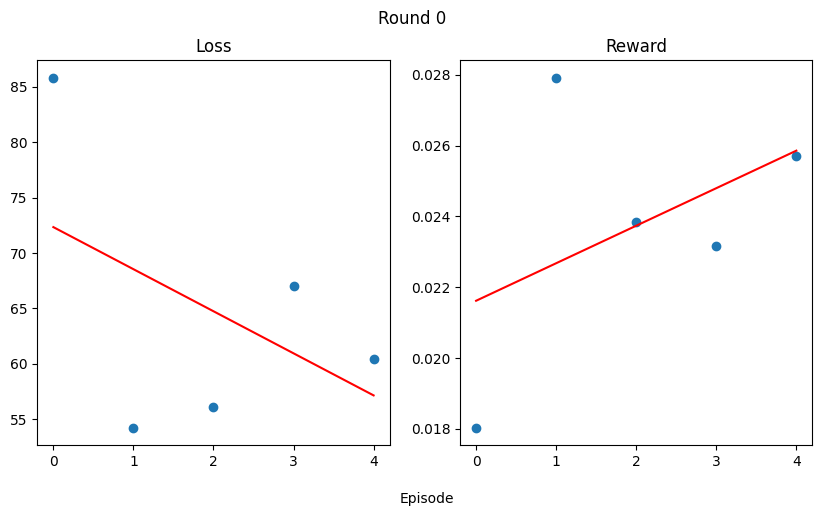

In [298]:
for i in range(1):
    agent.train(num_episodes=5)
    make_plot(agent, round=i)

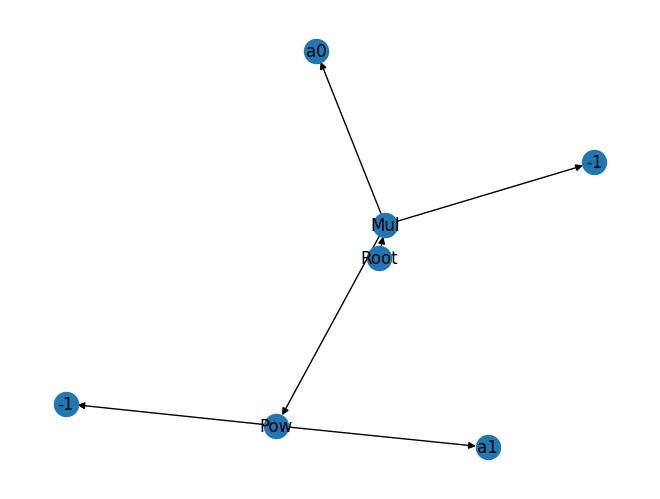

In [10]:
nx.draw(env.state_graph, labels=env.node_labels)